In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import csv

In [2]:
pd.set_option('float_format', '{0:.2f}'.format)

In [3]:
zillow_df = pd.read_csv("OutputData - Total.csv")
zipcode_df = pd.read_csv("Files/manhattan_mod.csv")

In [4]:
zillow_df.columns

Index(['Unnamed: 0', 'address', 'rent', 'sold', 'sold year', 'sqft', 'var',
       'zipcode'],
      dtype='object')

In [5]:
zipcode_df.columns

Index(['Neighborhood', 'zipcode'], dtype='object')

In [6]:
zillow_df = zillow_df.drop(columns='Unnamed: 0', axis=1) # axis 0 for row and axis 1 for column
zillow_df.head()

,address,rent,sold,sold year,sqft,var,zipcode
0,189 E 7th St,nan,3300000.00,2015.00,4200.00,1,10009
1,189 E 7th St,14995.00,4844809.00,2018.00,2183.00,0,10009
2,189 E 7th St,14995.00,nan,nan,nan,2,10009
3,526 E 5th St,23000.00,6100000.00,2018.00,5200.00,0,10009
4,133 Avenue D APT 16,3995.00,nan,nan,nan,2,10009


In [7]:
zillow_df = pd.merge(zillow_df, zipcode_df, on="zipcode", how="outer")

In [8]:
zillow_df.count()

address         23736
rent            23588
sold            13408
sold year       13408
sqft            13408
var             23736
zipcode         23737
Neighborhood    23604
dtype: int64

In [9]:
rent_df = zillow_df.groupby("Neighborhood", as_index=False).mean()
rent_df.columns

Index(['Neighborhood', 'rent', 'sold', 'sold year', 'sqft', 'var', 'zipcode'], dtype='object')

In [10]:
rent_df = rent_df.drop(columns=["sold","sold year","var", "sqft", "zipcode"], axis=1)

In [11]:
rent_df

,Neighborhood,rent
0,Central Harlem,3439.21
1,Chelsea/Clinton,6945.00
2,East Harlem,3612.47
3,Gramercy/Murray,5143.76
4,Greenwich/Soho,9915.68
5,Inwood/Washington Heights,2538.77
6,Lower Eastside,5384.64
7,Lower Manhattan,7744.46
8,Upper Eastside,6016.81
9,Upper Westside,5540.34


In [12]:
zillow_df = zillow_df[zillow_df.loc[:,"sold year"]==2018]

In [13]:
zillow_df = zillow_df.dropna(how="any")

In [14]:
zillow_df.count()

address         3248
rent            3248
sold            3248
sold year       3248
sqft            3248
var             3248
zipcode         3248
Neighborhood    3248
dtype: int64

In [15]:
zillow_df = zillow_df.groupby("Neighborhood", as_index=False).median()

In [16]:
sold_df = zillow_df[["Neighborhood","sold", "sqft"]]

In [17]:
sold_df["Avg 20% Downpayment"] = sold_df["sold"]*.2

sold_df["Avg High Closing Cost"] = sold_df["sold"]*.05
sold_df["Avg Property Taxes"] = sold_df["sold"]*.008
avg_property_insurance = 1595

year1 = 15 *12
year2 = 30 *12
interestRate1 = 3.95/100/12
interestRate2 = 4.5/100/12

sold_df["15 Years Monthly Mortgage"] = (sold_df["sold"] * .8) * (interestRate1 * (1 +interestRate1) 
                                                                 ** year1) / ((1+interestRate1) ** year1 - 1)
sold_df["30 Years Monthly Mortgage"] = (sold_df["sold"] * .8) * (interestRate2 * (1 +interestRate2) 
                                                                 ** year2) / ((1+interestRate2) ** year2 - 1)
#Variable is the maintenance cost

C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [18]:
clean_df = pd.merge(sold_df, rent_df, on="Neighborhood", how="outer")

In [19]:
clean_df

,Neighborhood,sold,sqft,Avg 20% Downpayment,Avg High Closing Cost,Avg Property Taxes,15 Years Monthly Mortgage,30 Years Monthly Mortgage,rent
0,Central Harlem,971993.50,1253.50,194398.70,48599.68,7775.95,5732.31,3939.96,3439.21
1,Chelsea/Clinton,1100000.00,1039.00,220000.00,55000.00,8800.00,6487.23,4458.83,6945.00
2,East Harlem,719000.00,1600.00,143800.00,35950.00,5752.00,4240.29,2914.45,3612.47
3,Gramercy/Murray,814000.00,900.00,162800.00,40700.00,6512.00,4800.55,3299.53,5143.76
4,Greenwich/Soho,2740000.00,1800.00,548000.00,137000.00,21920.00,16159.09,11106.54,9915.68
5,Inwood/Washington Heights,587000.00,1000.00,117400.00,29350.00,4696.00,3461.82,2379.39,2538.77
6,Lower Eastside,984000.00,875.00,196800.00,49200.00,7872.00,5803.12,3988.63,5384.64
7,Lower Manhattan,1421212.50,1329.50,284242.50,71060.62,11369.70,8381.57,5760.86,7744.46
8,Upper Eastside,975000.00,1150.00,195000.00,48750.00,7800.00,5750.04,3952.15,6016.81
9,Upper Westside,1050000.00,1127.00,210000.00,52500.00,8400.00,6192.35,4256.16,5540.34


In [ ]:
clean_df.to_csv("RentvsMortgage.csv")

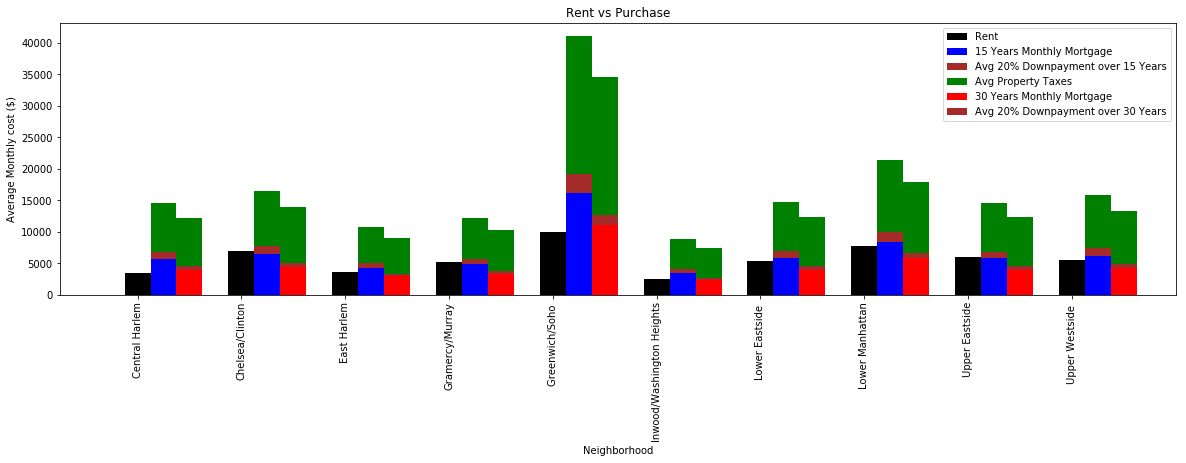

In [45]:
x_axis = np.arange(len(clean_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,5))

bar_width = 0.25

plt.bar(x_axis, clean_df['rent'], bar_width, color="black", label="Rent")
plt.bar(x_axis+bar_width, clean_df['15 Years Monthly Mortgage'], bar_width, color="blue", label="15 Years Monthly Mortgage")
plt.bar(x_axis+bar_width, clean_df['Avg 20% Downpayment']/year1, bar_width, color="brown",
        bottom=clean_df['15 Years Monthly Mortgage'], label="Avg 20% Downpayment over 15 Years")
plt.bar(x_axis+bar_width, clean_df['Avg Property Taxes'], bar_width, color="green",
        bottom=clean_df['Avg 20% Downpayment']/year1+clean_df['15 Years Monthly Mortgage'], label="Avg Property Taxes")

plt.bar(x_axis+bar_width*2, clean_df['30 Years Monthly Mortgage'], bar_width, color="red", label="30 Years Monthly Mortgage")
plt.bar(x_axis+bar_width*2, clean_df['Avg 20% Downpayment']/year2, bar_width, color="brown",
        bottom=clean_df['30 Years Monthly Mortgage'], label="Avg 20% Downpayment over 30 Years")
plt.bar(x_axis+bar_width*2, clean_df['Avg Property Taxes'], bar_width, color="green",
        bottom=clean_df['Avg 20% Downpayment']/year2+clean_df['30 Years Monthly Mortgage'])

plt.xticks(tick_locations, clean_df['Neighborhood'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))

plt.title("Rent vs Purchase")
plt.xlabel("Neighborhood")
plt.ylabel(f"Average Monthly cost ($)")

plt.legend()

plt.show()

In [ ]:
clean_df.columns